In [2]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_friedman1

# Exercici de Regressió

En aquest primer exercici el que es demana és que repetiu el mateix procés que el tutorial però en un problema una mica més complicat. La vostra xarxa haurà de tenir alguna capa més.

## Generació de les dades
Emprarem un conjunt de dades que s'autogenera a partir de certs paràmetres, la variable a predir es correspon amb la següent fórmula:

$y(X) = 10 * \sin(\pi * X[0] * X[1]) + 20 * (X[2] - 0.5)^2 + 10 * X[3] + 5 * X[4] + noise * N(0, 1).$

Com podeu observar tenim 5 variables útils i les altres que són independents de `y`.

[Més informació](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-1/Multivariate-Adaptive-Regression-Splines/10.1214/aos/1176347963.full)

**ToDo**

- En aquesta passa només heu de separar les dades en conjunt d'entrenament i test. Les etiquetes del conjunt de test s'han de dir `y_test`.


In [3]:
X, y = make_friedman1(n_samples=2000, n_features=10, noise=0.0, random_state=33)

X = torch.from_numpy(X)
y =  torch.from_numpy(y)
X = X.float()
y = y.float()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Definició de la xarxa

**ToDo**
- Heu de definir la xarxa amb la qual voleu treballar, provau amb diferents arquitectures.
- Heu de definir la funció de pèrdua, podeu emprar MSE.

In [25]:
model = torch.nn.Sequential(    
    torch.nn.Linear(10, 5),
    torch.nn.Linear(5, 1),
    torch.nn.Flatten(0, 1))

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate =  1e-6

# Definition of the optimizer: Stochastic Gradient Descent (SGD)
# Rep per paràmetre els paràmetres del model i el
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

## Entrenament

En aquesta part heu de definir el bucle d'entrenament:

**ToDo**

  - Predicció.
  - Càlcul de la funció de pèrdua.
  - Càlcul del descens del gradient.

Volem veure un gràfic on es mostri el valor de la funció de pèrdua pel conjunt d'entrenament i del conjunt de test a cada iteració.


In [26]:
iter = 5000

for t in range(iter):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(X_train)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred,y_train)
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        #for param in model.parameters():
            #param -= learning_rate * param.grad
        optimizer.step()

## Resultats

**ToDo**
- Dibuixar el gràfic emprant un gràfic on podrem comparar com de bons són els nostres resultats respecte els

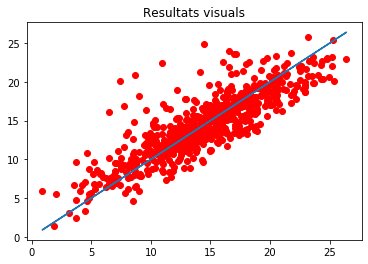

In [27]:
y_pred = model(X_test)

plt.title("Resultats visuals")
plt.scatter(y_test, y_pred.detach().numpy(), c="red")
plt.plot(y_test, y_test)
plt.show()